In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'dataset.csv' with your data file)
data = pd.read_csv('./Econ424_F2023_PC2_training_set_v1.csv')


In [8]:
data.describe()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS,REGION,KITCHEN,FLOORS,LAUNDY,RECRM,METRO,METRO3
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.00000,19999.000000,19999.000000,19999.000000
mean,12.054003,1.915196,3.207610,1970.747587,2339.850528,44339.419240,6.571029,2.842342,1.005350,1.931947,0.39192,0.073954,5.664483,1.886644
std,1.093036,0.779724,0.872225,25.543423,1969.763693,114513.834797,1.684882,1.007669,0.072951,1.033308,0.53957,0.271272,2.464029,1.010843
min,0.000000,0.000000,0.000000,1919.000000,99.000000,200.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
25%,11.512925,1.000000,3.000000,1950.000000,1400.000000,6000.000000,5.000000,2.000000,1.000000,1.000000,0.00000,0.000000,7.000000,2.000000
50%,12.100712,2.000000,3.000000,1975.000000,2000.000000,11000.000000,6.000000,3.000000,1.000000,2.000000,0.00000,0.000000,7.000000,2.000000
75%,12.611538,2.000000,4.000000,1990.000000,2487.000000,43925.933653,8.000000,4.000000,1.000000,2.000000,1.00000,0.000000,7.000000,2.000000
max,15.476535,10.000000,8.000000,2011.000000,20159.000000,933185.000000,15.000000,4.000000,2.000000,21.000000,5.00000,3.000000,7.000000,9.000000


<Axes: xlabel='UNITSF', ylabel='LOGVALUE'>

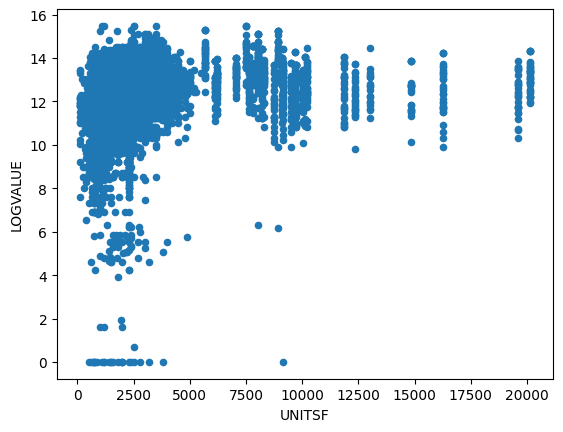

In [23]:
data.plot.scatter('UNITSF','LOGVALUE')

In [6]:
# Assuming 'log_housing_value' is your target variable
X = data.drop('LOGVALUE', axis=1)  # Features
y = data['LOGVALUE']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
model = DecisionTreeRegressor(max_depth=10)  # You can adjust max_depth as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.0828135221262154
Mean Absolute Error: 0.5733717482455007
R-squared: 0.07914859007706498


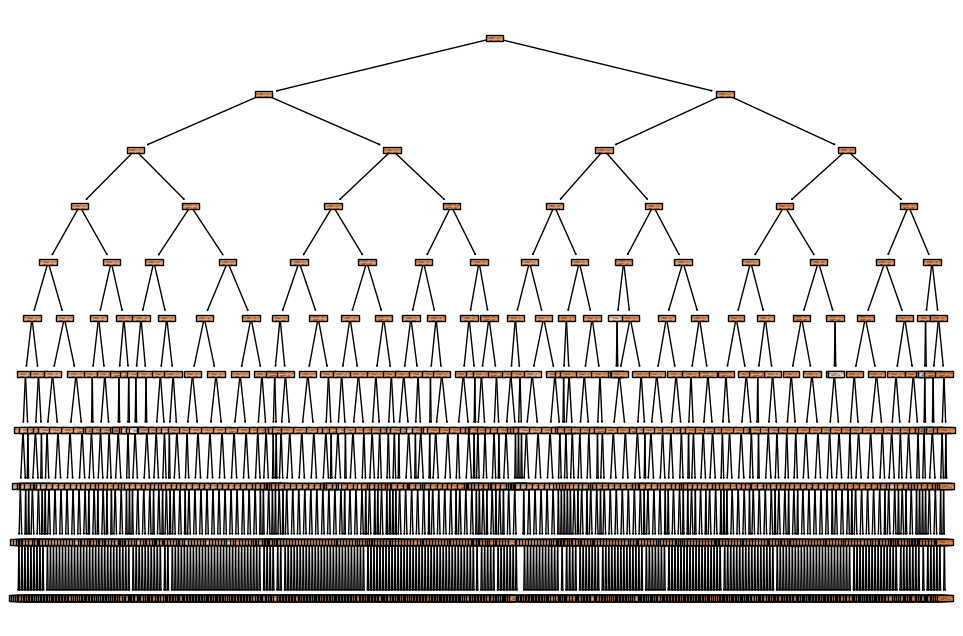

In [7]:
# Visualize the regression tree (optional)
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()